### **Ejercicio 1**

Escribir una función que calcule la intersección de dos diccionarios de la siguiente forma:

-  Si una clave está en ambos diccionarios, en la intersección el significado de dicha clave es una tupla con los valores de ambos diccionarios
-  Si una clave está en uno solo de los diccionarios, no formará parte de la intersección.

Ejemplo:

dic1 = {1:“casa” , 20:“perro” , 8:“gato” , 10:“mate” , 5:“auto”} y dic2 = {5:3 , 2:15 , 8:20 , 15:1 , 20:25}

inter = interseccion(dic1, dic2) -> inter = {20 : (“perro”,25) , 8 : (“gato”,20) , 5 : (“auto”,3)}


In [ ]:
def interseccionDiccionarios(dic1:Diccionario, dic2:Diccionario)->Diccionario:
  interseccion = Diccionario()
  for key1 in dic1.keys():
    for key2 in dic2.keys():
      if key1 == key2:
        interseccion[key1] = (dic1[key1], dic2[key2])
  return interseccion


def inter(d1, d2)-> Diccionario:
  dic = Diccionario()
  for key in d1.keys():
    if key in d2:
      dic.insert(key, (d1[key], d2[key]))
  return dic

dic1 = Diccionario((1, 20, 8, 10, 5),("casa","perro","gato","mate","auto"))
dic2 = Diccionario((5, 2, 8, 15, 20),(3, 15, 20, 1, 25))
interseccionDiccionarios(dic1, dic2)

{(8, ('gato', 20)), (20, ('perro', 25)), (5, ('auto', 3))}

### **Ejercicio 2**

Escribir una operación del TDA ABB, que calcule el promedio de los valores acumulados en el árbol. La operación puede calcular dos promedios distintos en función del valor de un parámetro de entrada: el primero es el promedio de los valores almacenados solo en las hojas del árbol, el segundo, el promedio teniendo en cuenta todos los elementos del árbol. Especificar la estructura de datos del tipo ABB y del NodoArbol utilizados.

In [ ]:
class ABB(ABB):
  def sumaHojas(self)->int:
    totalHojas = 0
    if not self.estaVacio():
      totalHojas = self.__raiz.sumaHojasNodo()
    return totalHojas

  def sumaTotal(self)->int:
    totalNodos = 0
    if not self.estaVacio():
      totalNodos = self.__raiz.sumaTotalNodo()
    return totalNodos

  def cantHojas(self):
    cant = 0
    if not self.estaVacio():
      cant = self.__raiz.cantHojasNodo()
    return cant

  def pesoArbol(self):
    peso = 0
    if not self.estaVacio():
      peso = self.__raiz.pesoArbolNodo()
    return peso

  def promedio(self, tipo):
    promedio = 0
    if not self.estaVacio():
      if tipo == "hoja":
        promedio = self.sumaHojas() / self.cantHojas()
      elif tipo == "total":
        promedio = self.sumaTotal() / self.pesoArbol()
      else:
        raise Exception("tipo incorrecto")
    return promedio

  class __NodoArbol(ABB.__NodoArbol):
    def cantHojasNodo(self):
      cant = 0
      if self.esHoja():
        cant = 1
      if self.tieneIzquierdo():
        cant = self.izquierdo.cantHojasNodo()
      if self.tieneDerecho():
        cant += self.derecho.cantHojasNodo()
      return cant

    def pesoArbolNodo(self):
      peso = 1
      if self.tieneIzquierdo():
        peso += self.izquierdo.pesoArbolNodo()
      if self.tieneDerecho():
        peso += self.derecho.pesoArbolNodo()
      return peso

    def sumaHojasNodo(self):
      suma = 0
      if self.esHoja():
        suma = self.dato
      if self.tieneIzquierdo():
        suma = self.izquierdo.sumaHojasNodo()
      if self.tieneDerecho():
        suma += self.derecho.sumaHojasNodo()
      return suma

    def sumaTotalNodo(self):
      suma = self.dato
      if self.tieneIzquierdo():
        suma += self.izquierdo.sumaTotalNodo()
      if self.tieneDerecho():
        suma += self.derecho.sumaTotalNodo()
      return suma


arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.promedio("hoja")

50

### **Ejercicio 3**

Escribir una operación del TDA Lista que inserte un dato de modo similar al insertar básico, al final de la lista (append). Pero ahora, no se debe permitir insertar datos repetidos, si un dato ya esta almacenado entonces la lista no varía. No se puede utilizar las operaciones insertar y buscar del TDA Lista. Especificar la estructura de datos del tipo Lista y del NodoLista utilizados.

In [2]:
class Lista(Lista):
  def insertarSinRepetir(self, dato):
    nodoNuevo = Lista.__NodoLista(dato)
    if self.estaVacia():
      self.__primero = nodoNuevo
    else:
      aux = self.__primero
      while dato != aux.dato and aux.tieneSiguiente():
        aux = aux.siguiente
      if dato != aux.dato:
        aux.siguiente = nodoNuevo

l1 = Lista()
l1.insertarSinRepetir(2);l1.insertarSinRepetir(5);l1.insertarSinRepetir(9);l1.insertarSinRepetir(12);l1.insertarSinRepetir(25);l1.insertarSinRepetir(32)
print(l1)
l1.insertarSinRepetir(22)
l1.insertarSinRepetir(5)
print(l1)

primero -> 2 -> 5 -> 9 -> 12 -> 25 -> 32 -|
primero -> 2 -> 5 -> 9 -> 12 -> 25 -> 32 -> 22 -|


In [ ]:
class ListaRec(ListaRec):
  def insertarAlFinal(self,dato):
    nodoNuevo = ListaRec.__NodoLista(dato)
    if self.estaVacia():
      self.__primero = nodoNuevo
    else:
      self.__primero.insertarAlFinalNodo(nodoNuevo)

  class __NodoLista(ListaRec.__NodoLista):
    def insertarAlFinalNodo(self,nodoAInsertar):
      if not self.tieneSiguiente() and self.dato != nodoAInsertar.dato:
        self.siguiente = nodoAInsertar
      elif self.tieneSiguiente() and self.dato != nodoAInsertar.dato:
        self.siguiente.insertarAlFinalNodo(nodoAInsertar)
      else:
        raise Exception("El dato ingresado ya se encuentra en la lista")

### **Ejercicio 4**

Escribir la función **maximoPorNumero** que recibe una lista de pares (x,y) que indica que el número x está asociado al valor y.

Se debe devolver un diccionario con clave x y significado (valor) y, donde y sea el máximo valor asociado a x.

Se debe resolver usando las operaciones del TDA diccionario que vimos en clase,sin violar el encapsulamiento ni utilizando estructuras auxiliares.

lista = [ (1,4) , (2,5) , (1,5) , (3,8) , (2,1) , (2,5) ]

dic = maximoPorNumero(lista)

Entonces, dic = {(1 , 5) , (2 , 5), (3, 8)}

In [ ]:
def maximoPorNumero(lista):
  dic = Diccionario()
  for elemento in lista:
    if elemento[0] not in dic:
      dic.insert(elemento[0], elemento[1])
    else:
      if elemento[1] > dic[elemento[0]]:
        dic[elemento[0]] = elemento[1]

  return dic

maximoPorNumero([(1,4) , (2,5) , (1,5) , (3,8) , (2,1) , (2,5)])

{(1, 5), (2, 5), (3, 8)}

### **Ejercicio 5**

Escribir una operación del TDA Lista (enteros) que tome una lista y elimine todos los elementos impares, la operación **NO** debe retornar una nueva lista, sino modificar la lista con la cual se llama a la función. Definir la estructura de datos del tipo Lista y del NodoLista utilizados.

**Nota: No se puede utilizar la operación eliminar del TDA lista y el primer elemento siempre es par.**

In [4]:
class Lista(Lista):
  def eliminarImpares(self):
    aux = self.__primero

    while aux.tieneSiguiente():
      if aux.siguiente.dato % 2 != 0:
        aux.siguiente = aux.siguiente.siguiente
      else:
        aux = aux.siguiente

l1 = Lista()
l1.insertarSinRepetir(2);l1.insertarSinRepetir(5);l1.insertarSinRepetir(9);l1.insertarSinRepetir(12); l1.insertarSinRepetir(16); l1.insertarSinRepetir(33)
print(l1); l1.eliminarImpares(); print(l1)

primero -> 2 -> 5 -> 9 -> 12 -> 16 -> 33 -|
primero -> 2 -> 12 -> 16 -|


In [ ]:
class ListaRec(ListaRec):
  def eliminarImpares(self):
    if not self.estaVacia():
      self.__primero.eliminarImparesNodo()

  class __NodoLista(ListaRec.__NodoLista):
    def eliminarImparesNodo(self):
      if self.tieneSiguiente():
          if not esPar(self.siguiente.dato):
              self.siguiente = self.siguiente.siguiente
              self.eliminarImparesNodo()
          else:
              self.siguiente.eliminarImparesNodo()

### **Ejercicio 6**

Escribir la operación **sumaHastaNivel** del TDA ABB que recibe un nivel N por parámetro y retorna la suma de todos los números en el ABB en nodos que estén a nivel menor o igual a N. La operación puede hacer uso de las operaciones del TDA ABB: estaVacio y del TDA NodoArbol: tieneIzquierdo y tieneDerecho

In [19]:
class ABB(ABB):
  def sumaHastaNivel(self, nivel):
    suma = 0
    if not self.estaVacio():
      suma = self.__raiz.sumaHastaNivelNodo(nivel)
    return suma

  class __NodoArbol(ABB.__NodoArbol):
    def sumaHastaNivelNodo(self, nivel, nivelActual = 0):
      suma = 0
      if nivelActual <= nivel:
        suma = self.dato
      if self.tieneIzquierdo():
        suma += self.izquierdo.sumaHastaNivelNodo(nivel, nivelActual + 1)
      if self.tieneDerecho():
        suma += self.derecho.sumaHastaNivelNodo(nivel, nivelActual + 1)
      return suma


arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.sumaHastaNivel(1)

150

### **Ejercicio 7**

Escribir la operación insertarEnPosI del TDA Lista que inserte una lista completa dentro de otra en una posición determinada. La función debe recibir como parámetro la lista que debe ser insertada y la posición de inserción. Si la posición es más grande que el tamaño de la lista original, la nueva lista se inserta al final. Definir la estructura de datos del TDA Lista utilizada. No se pueden utilizar las operaciones insertar y append del tipo Lista.
No se puede usar el TDA lista de python.

Ejemplo:

Si lista1 = [3 , 5 , 8 , 2 , 6 , 7] y lista2 = [4 , 9 , 1 , 2]

lista1.insertarEnPosI(lista2 , 3)

Entonces: lista1 = [3 , 5 , 8 , 4 , 9 , 1 , 2 , 2 , 6 , 7]


In [ ]:
class Lista(Lista):
  def insertarEnPosLista(self, lista, pos):
    if not lista.estaVacia():
      if self.estaVacia():
        self.__primero = lista.__primero
      elif pos >= 0:
        auxLista = lista.__primero
        while auxLista.tieneSiguiente():
            auxLista = auxLista.siguiente

        if pos == 0:
          auxLista.siguiente = self.__primero
          self.__primero = lista.__primero

        else:
          aux = self.__primero
          posActual = 0
          while posActual != pos - 1 and aux != None:
            aux = aux.siguiente
            posActual += 1

          auxLista.siguiente = aux.siguiente
          aux.siguiente = lista.__primero

l1 = Lista()
l1.insertarSinRepetir(3);l1.insertarSinRepetir(5);l1.insertarSinRepetir(8);l1.insertarSinRepetir(2); l1.insertarSinRepetir(6); l1.insertarSinRepetir(7)
print(l1)
l2 = Lista()
l2.insertarSinRepetir(4);l2.insertarSinRepetir(9);l2.insertarSinRepetir(1);l2.insertarSinRepetir(2)
print(l2)
l1.insertarEnPosLista(l2, 3); print(l1)

primero -> 3 -> 5 -> 8 -> 2 -> 6 -> 7 -|
primero -> 4 -> 9 -> 1 -> 2 -|
primero -> 3 -> 5 -> 8 -> 4 -> 9 -> 1 -> 2 -> 2 -> 6 -> 7 -|


### **Ejercicio 8**

Escribir la función **palabrasPorTamaño** que recibe una lista de palabras (strings) y retorna un diccionario que posee como clave el tamaño de palabra y como significado una lista con las palabras de ese tamaño que forman parte de la lista de entrada.

Se debe resolver usando las operaciones del TDA diccionario que vimos en clase, sin violar el encapsulamiento ni utilizando estructuras auxiliares.

Por ejemplo:

listaEntrada = [taza , perro , computadora , libro , en , casa , si]

dic  = palabrasPorTamaño(listaEntrada)

Entonces, dic = { (4 , [taza , casa]) , (5 , [perro , libro]) , (11 , [computadora]) , (2 , [en , si]) }


In [ ]:
def palabrasPorTamaño(listaPalabras):
  dic = Diccionario()

  for palabra in listaPalabras:
    size = len(palabra)
    if size not in dic:
      dic.insert(size, [palabra])
    else:
      dic[size].append(palabra)
  return dic

listaEntrada = ["taza" , "perro" , "computadora" , "libro" , "en" , "casa" , "si"]
dic = palabrasPorTamaño(listaEntrada)
print(dic)

{(2, ['en', 'si']), (11, ['computadora']), (4, ['taza', 'casa']), (5, ['perro', 'libro'])}


### **Ejercicio 9**

Escribir la operación **sumaInternosMenores** del TDA ABB que devuelva la suma de los elementos de los nodos internos del árbol que son menores a un valor N que se recibe por parámetro. Definir la estructura del TDA ABB utilizado. La función puede hacer uso de las siguientes operaciones del TDA ABB: estaVacio y del TDA NodoArbol: tieneIzquierdo, tieneDerecho y esHoja.

In [25]:
class ABB(ABB):
  def sumaInternosMenores(self, valor):
    suma = 0
    if not self.estaVacio():
      suma = self.__raiz.sumaInternosMenores(valor)
    return suma

  class __NodoArbol(ABB.__NodoArbol):
    def sumaInternosMenores(self, dato):
      suma = 0
      if self.dato < dato and not self.esHoja():
        suma += self.dato
      if self.tieneIzquierdo():
        suma += self.izquierdo.sumaInternosMenores(dato)
      if self.tieneDerecho():
        suma += self.derecho.sumaInternosMenores(dato)
      return suma


arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)
arbol1.treePlot("nuevo")

arbol1.sumaInternosMenores(50)

85

### **Ejercicio 10**

Crear la operación **insertarCeros** del TDA Lista, que inserte un 0 (cero) entre 2 números pares consecutivos. La función no debe crear una nueva lista, debe modificar la lista con la cual se llama a la operación. Definir la estructura de datos del TDA Lista utilizada. No se pueden utilizar las operaciones insertar y append del tipo Lista.

No se puede usar el TDA lista de python.

Ejemplo:

lista1 = [1 , 3 , 4 , 6 , 8 , 1 , 5 , 8 , 10 , 7]

lista1.insertarCeros()

Entonces, lista1 = [1 , 3 , 4 , 0 , 6 , 0 , 8 , 1 , 5 , 8 , 0 , 10 , 7]

In [42]:
class Lista(Lista):
  def insertarCeros1(self):
    if not self.estaVacia():
      aux = self.__primero

      while aux.tieneSiguiente() and aux != None:
        if aux.dato % 2 == 0 and aux.siguiente.dato % 2 == 0:
          nodoCero = Lista.__NodoLista(0)
          nodoCero.siguiente = aux.siguiente
          aux.siguiente = nodoCero
          aux = aux.siguiente.siguiente
        else:
          aux = aux.siguiente

class Lista(Lista):
  def insertarCeros(self):
      aux = self.__primero

      while aux != None and aux.siguiente != None:
          if aux.dato != 0 and aux.dato % 2 == 0 and aux.siguiente.dato % 2 == 0:
              nuevo = Lista.__NodoLista(0)
              nuevo.siguiente = aux.siguiente
              aux.siguiente = nuevo
          aux = aux.siguiente

l1 = Lista()
l1.insertarSinRepetir(1);l1.insertarSinRepetir(3);l1.insertarSinRepetir(4);l1.insertarSinRepetir(6); l1.insertarSinRepetir(8); l1.insertarSinRepetir(1); l1.insertarSinRepetir(5); l1.insertarSinRepetir(8); l1.insertarSinRepetir(10); l1.insertarSinRepetir(7)
print(l1); l1.insertarCeros1(); print(l1)

primero -> 1 -> 3 -> 4 -> 6 -> 8 -> 5 -> 10 -> 7 -|
primero -> 1 -> 3 -> 4 -> 0 -> 6 -> 0 -> 8 -> 5 -> 10 -> 7 -|


### **Ejercicio 11**

Escribir la función **resta** que recibe dos diccionarios como parámetro (dic1 y dic2) y retorna un nuevo diccionario con la resta los dos, con el siguiente criterio:

-  Cuando una clave sólo está en el dic1, pasa al diccionario de salida con el significado original.

-  Si una clave está en ambos diccionarios de entrada (dic1 y dic2), no pasa al diccionario de salida.

Se debe resolver usando las operaciones del TDA diccionario que vimos en clase, sin violar el encapsulamiento ni utilizando estructuras auxiliares.

Ejemplo:

dic1 = {(1 , 4) , (3 , 6) , (8 , 14) , (4 , 12) , (2 , 6)} y dic2 = {(8 , 5) , (10 , 6) , (1 , 7) , (2 , 9) , (14 , 8)}

dic3  = resta(dic1 , dic2)

Entonces, dic3 = {(3 , 6) , (4 , 12)}


In [ ]:
def resta(dic1:Diccionario, dic2:Diccionario)->Diccionario:
  dic = Diccionario()
  for key in dic1.keys():
    if key not in dic2:
        dic.insert(key, dic1[key])
  return dic

dic1 = Diccionario((1, 3, 8, 4, 2),(4, 6, 14, 12, 6))
dic2 = Diccionario((8, 10, 1, 2, 14),(5, 6, 7, 9, 8))
dic3 = resta(dic1, dic2)
print(dic3)

{(3, 6), (4, 12)}


### **Ejercicio 12**

Escribir la operación **obtenerHermano** del TDA ABB que recibe un número N y retorna el número del nodo hermano del nodo que contiene al número N. Dos nodos se definen como hermanos cuando tienen el mismo padre. Si el número N no está en el árbol o no tienen nodo hermano, la operación debe retornar None.


In [ ]:
class ABB(ABB):
  def obtenerHermano(self, numero):
    nodoHermano = None
    if not self.estaVacio() and self.__raiz.dato != numero:
      nodoHermano = self.__raiz.obtenerHermano(numero)
    return nodoHermano

  class __NodoArbol(ABB.__NodoArbol):
    def obtenerHermano(self, numero):
      nodoHermano = None
      if numero < self.dato:
        if self.tieneIzquierdo():
          if self.izquierdo.dato == numero:
            if self.tieneDerecho():
              nodoHermano = self.derecho.dato
          else:
              nodoHermano = self.izquierdo.obtenerHermano(numero)
      else:
        if self.tieneDerecho():
          if self.derecho.dato == numero:
            if self.tieneIzquierdo():
              nodoHermano = self.izquierdo.dato
          else:
              nodoHermano = self.derecho.obtenerHermano(numero)
      return nodoHermano

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.obtenerHermano(70)

55

### **Ejercicio 13**
Escribir la operación eliminarSegmento del TDA Lista, que recibe dos posiciones (“inicio” y “final”) como entrada y elimina todos los nodos en la lista entre ambas (incluidas). Si la posición “final” es más grande que el tamaño de la lista, se eliminan todos los elementos desde la posición “inicio” hasta
el final. No se puede utilizar la operación eliminar del tipo Lista. No se puede usar el TDA Lista de Python. Pueden suponer que siempre la posición “final” es mayor o igual que la “inicio”.

Ejemplo:

Si lista = [3 , 5 , 8 , 2 , 6 , 7 , 5 , 8 , 2]

lista.eliminarSegmento(2,5) -> lista = [3 , 5 , 5 , 8 , 2]

lista.eliminarSegmento(4,50) -> lista = [3 , 5 , 8 , 2 ]

lista.eliminarSegmento(1,1) -> lista = [3 , 8 , 2 , 6 , 7 , 5 , 8 , 2]

In [58]:
class Lista(Lista):
  def eliminarSeg(self, inicio, final):
    pos = 0
    if inicio == 0:
      while pos != final + 1:
        self.__primero = self.__primero.siguiente
        pos += 1
    else:
      aux = self.__primero
      while pos != inicio - 1:
        aux = aux.siguiente
        pos += 1

      aux2 = aux
      while pos != final + 1 and aux2 != None:
        aux2 = aux2.siguiente
        pos += 1

      aux.siguiente = aux2


l1 = Lista()
l1.insertarSinRepetir(3);l1.insertarSinRepetir(5);l1.insertarSinRepetir(8);l1.insertarSinRepetir(2); l1.insertarSinRepetir(6); l1.insertarSinRepetir(7)
print(l1); l1.eliminarSeg(1, 66); print(l1)

primero -> 3 -> 5 -> 8 -> 2 -> 6 -> 7 -|
primero -> 3 -|


In [59]:
class Lista(Lista):
  def eliminarSegmento(self, posInicio, posFinal):
      aux1 = self.__primero
      posActual = 0

      if posInicio == 0:
        while posActual != posFinal:
          posActual += 1
          aux1 = aux1.siguiente
        self.__primero = aux1.siguiente
      else:
        while posActual != posInicio - 1:
          aux1 = aux1.siguiente
          posActual +=1

        if posFinal < self.tamanio():
          aux2 = aux1
          while posActual != posFinal:
            aux2 = aux2.siguiente
            posActual += 1
          aux1.siguiente = aux2.siguiente
        else:
          aux1.siguiente = None


### **Ejercicio 14**
Escribir una funcion **promedios** que recibe una lista de materias (strings) y una lista de notas (enteros) del mismo tamaño. Retorna un diccionario que posee como clave cada materia y como significado su nota promedio
Se debe resolver usando operaciones del TDA diccionario que vimos en clase, sin violar el encapsulamiento ni utilizando estructuras auxiliares.

Por ejemplo:

lista materias = ["Intro Prog" , **"Objetos"**,"Estructura de datos","Intro Prog","Ingles",**"Objetos"**,"Estructura de Datos"]

listaNotas = [4,4,4,6,7,6,6]

dic = promedios(listaMaterias,listaNotas)

Entonces, dic = { ("IntroProg",5), ("Estructura de Datos",5), ("Ingles",7), ("Objetos",5) }



In [63]:
materias = ["Intro Prog", "Objetos", "Estructura de Datos", "Intro Prog", "Inglés", "Objetos", "Estructura de Datos"]
notas = [6, 4, 4, 6, 7, 6, 6]


def promediosMaterias(materias, notas):
  dic = Diccionario()
  for i in range(len(materias)):
    if materias[i] not in dic:
      dic[materias[i]] = [notas[i]]
    else:
      dic[materias[i]].append(notas[i])

  for materia in dic.keys():
    tamanio = len(dic[materia])
    suma = 0
    for notas in dic[materia]:
      suma += notas
      dic[materia] = suma / tamanio
  return dic

promediosMaterias(materias, notas)

{('Objetos', 5.0), ('Estructura de Datos', 5.0), ('Intro Prog', 6.0), ('Inglés', 7.0)}

### **Ejercicio 15**

Al puerto de Ensenada arriban camiones cargados con mercadería y hasta la hora de apertura de controles se van ordenando uno detrás de otro en orden de llegada.
Cuando se abren las puertas, los controladores pesan la carga y ordenan los camiones en base a este dato para realizar el análisis
de las cargas.

Implementar las siguientes funciones:

- **ordenaParaAnalizar:** Toma como entrada una lista con los pesos de los camiones segun el orden de llegada y devuelve una estructura de datos con esos pesos almacenados de forma ordenada.

- **promedioDeCarga:** Toma la estructura con el orden de los pesos y devuelve el promedio de carga.

- **rangoDinamicoDeCarga:** Recibe la estructura con el orden y devuelve la diferencia entre la máxima y la mínima carga del día.

- **impuestoACobrar:** Recibe la estructura y calcula el impuesto a cobrarle a quienes superan una determinada carga. Esta función necesita el peso de corte y el valor del impuesto por kilo superado. Debe retornar una lista de valores a cobrar.

**Nota: Se pueden utilizar todas las operaciones de los TDA que implementamos en clase.**

In [ ]:
class ABB(ABB):
  def ordenParaAnalizar(self, listaDePesos):
    arbolDePesos = ABB()
    for posicion in range(listaDePesos.tamanio()):
      arbolDePesos.insertar(listaDePesos.obtener(posicion))
    return arbolDePesos

  def ordenParaAnalizar1(self, listaDePesos):
    arb = ABB()
    for peso in listaDePesos:
      arb.insertar(peso)
    return arb

  def promedioDeCarga(self):
    suma = 1
    peso = 1
    if not self.estaVacio():
      peso = self.peso()
      suma = self.__raiz.calcularSumaTotal()
    return suma / peso

  class __NodoArbol(ABB.__NodoArbol):
    def calcularSumaTotal(self):
      suma = self.dato
      if self.tieneIzquierdo():
        suma += self.izquierdo.calcularSumaTotal()
      if self.tieneDerecho():
        suma += self.derecho.calcularSumaTotal()
      return suma

pesos = Lista()
pesos.agregarAlFinal(5); pesos.agregarAlFinal(3); pesos.agregarAlFinal(2); pesos.agregarAlFinal(4); pesos.agregarAlFinal(7); pesos.agregarAlFinal(8); pesos.agregarAlFinal(6)
arbolDePesos = ABB()
arbolDePesos = arbolDePesos.ordenParaAnalizar1(pesos)

arbolDePesos.promedioDeCarga()

5.0

### **Ejercicio 16**

En muchos sistemas las fechas se utilizan como claves para ordenar datos. No obstante, las fechas pueden tratarse de diferentes maneras. Una de ellas, a partir de la norma ISO 8601 es la fecha calendario que tiene 4 caracteres para el año, dos para el mes y dos para los días. Para facilitar su tratamiento se puede transformar en un número entero de 8 dígitos uniendo el año, el mes y el día. Una ventaja de este formato es que existe una relación directa en formato numérico y de esa forma se pueden hacer comparaciones de forma muy simple. Por ejemplo: el 16 de noviembre de 2021 es una fecha mayor que el 10 de diciembre de 2015. Llevando a números: 20211116 > 20151210. Con algunas cuantas operaciones se pueden calcular diferencias de años, meses, días.
Sin entrar en detalles, y para simplificar, consideremos además que son fechas mayores al 01/01/1000 y menores o iguales a la fecha de hoy 20211116.

Supongamos que tenemos entonces una estructura que usa las fechas en este formato como claves, almacenados de forma ordenada. Implementar las siguientes funciones:

- **anioMaximo:** Dada la estructura, retorna el año de la fecha mas reciente almacenada.

- **fechasDesde:** Dada la estructura y una fecha de inicio (en el mismo formato), retorna una lista ordenada con las fechas guardadas que sean mayores que la fecha de inicio.

- **esCumpleanios:** Suponiendo que la estructura se usa para almacenar fechas de cumpleaños, esta función recibe la estructura y una lista de fechas (en igual formato) y retorna otra lista (del mismo tamaño de la entrada) con False si la fecha de esa posición no es cumpleaños y True si lo es.

Nota: Se pueden utilizar todas las operaciones de los TDA que implementamos en clase.

In [ ]:
from datetime import datetime

class Lista(Lista):

 # def anioMaximo(self)
  #  aux = str(self.obtener(self.tamanio()-1))
   # año = str()
    #for i in range(0, 4):
     # año += aux[i]
   # return int(año)

  def anioMaximo(self):
    max_fecha = None
    if not self.estaVacia():
      max_fecha = self.obtener(self.tamanio() - 1) // 10000
    return max_fecha

  def fechasDesde(self, fechaInicio):
    lista = Lista()
    aux = self.__primero

    while aux != None:
      if aux.dato > fechaInicio:
        lista.agregarAlFinal(aux.dato)
      aux = aux.siguiente
    return lista

  def esCumpleanios(self, lista_fechas):
    resultado = Lista()
    fechas_mmdd = set()
    nodoAux = self.__primero

    while nodoAux is not None:
        fechas_mmdd.add(nodoAux.dato % 10000)
        nodoAux = nodoAux.siguiente

    nodoAux = lista_fechas.__primero
    while nodoAux is not None:
        mmdd = nodoAux.dato % 10000
        resultado.agregarAlFinal(mmdd in fechas_mmdd)
        nodoAux = nodoAux.siguiente

    return resultado


años = Lista()
años.agregarAlFinal(20201108); años.agregarAlFinal(20231018); años.agregarAlFinal(20190911); años.agregarAlFinal(20171105); años.agregarAlFinal(20221225); años.agregarAlFinal(20240520);
años.agregarAlFinal(20240624)

cumpleanios_fechas = Lista()
for fecha in [20030522, 20110520, 20210623]:
    cumpleanios_fechas.agregarAlFinal(fecha)

años.esCumpleanios(cumpleanios_fechas)


primero -> False -> True -> False -|

### **Ejercicio 17**

In [ ]:

class Lista(Lista):
  def eliminarDesdeHasta(self, desde, hasta):
    if not self.estaVacia():
      pos = 0

      if desde == 0:
        if self.tamanio == 1:
          self.__primero = None
        else:
          self.__primero = self.__primero.siguiente
          while (pos < hasta and self.__primero.tieneSiguiente()):
            pos += 1
            self.__primero = self.__primero.siguiente

      else:
        aux = self.__primero

        while pos != desde - 1:
          aux = aux.siguiente
          pos += 1

        while pos != hasta and aux.tieneSiguiente():
          aux.siguiente = aux.siguiente.siguiente
          pos += 1


l = Lista()
l.agregarAlFinal(12); l.agregarAlFinal(6); l.agregarAlFinal(8); l.agregarAlFinal(9)

#l.eliminarDesdeHasta( 0,0)
l.eliminarDesdeHasta( 0,1)
#l.eliminarDesdeHasta(1,2)
print(l)


primero -> 8 -> 9 -|


### **Ejercicio 18**
Escribir una función maximoPorClave que recibe un diccionario de tipo (clave: string, valor: lista
 enteros) como parámetro y lo modifica dejando para cada palabra clave el mayor entero de su tupla devalores.

In [ ]:
def maxPC(dic):
  for clave in dic.keys():
    dic[clave] =  maximo(dic[clave])

def maximo(lista):
  maximo = lista[0]
  for elem in lista:
    if maximo < elem:
      maximo = elem
  return maximo

def maximoPorClave(dic):
  maximo = 0
  for key in dic.keys():
    for num in dic[key]:
      maximo = max(num, maximo)
    dic[key] = maximo
    maximo = 0
  return dic

dic = Diccionario()
dic.insert("casa", [1,2,3,0])  # ("casa" , 3)
dic.insert("perro", [4,1,2,3])
maximoPorClave(dic)
print(dic)

{('casa', 3), ('perro', 4)}


### **Ejercicio 19**
Escribir la operación mayoresEnNivel del TDA ABB que recibe un nivel y un número N y retorna la cantidad de números que están a ese nivel en el árbol y que son mayores que N. Definir la estructura del TDA ABB utilizado.

In [60]:


class ABB(ABB):
  def mayoresEnNivel(self, nivel, n):
    mayores = 0
    if not self.estaVacio():
      mayores = self.__raiz.mayoresEnNivelNodo(nivel, n)
    return mayores

  class __NodoArbol(ABB.__NodoArbol):
    def mayoresEnNivelNodo(self, nivel, n, nivelActual = 0):
      mayores = 0
      if self.dato > n and nivelActual == nivel:
        mayores = 1
      else:
        if self.tieneIzquierdo():
          mayores = self.izquierdo.mayoresEnNivelNodo(nivel, n, nivelActual + 1)
        if self.tieneDerecho():
          mayores += self.derecho.mayoresEnNivelNodo(nivel, n, nivelActual + 1)

      return mayores

arbol1 = ABB()
arbol1.insertar(50)
arbol1.insertar(40);arbol1.insertar(30);arbol1.insertar(45)
arbol1.insertar(60);arbol1.insertar(70);arbol1.insertar(55)
arbol1.insertar(47)

arbol1.mayoresEnNivel(2, 40)

3

### **Ejercicio 20**
Escribir la operacion **posicionCantImpares(cantImpares) --> posHasta** del TDA Lista, que recibe un numero entero y retorna una posicion. **posicionCantImpares** debe retornar la posicion que contiene una cantidad de numeros impares igual a **cantImpares** entre los indices 0 y **posHasta**. Si la cantidad de numeros umpares en la lista es menor que **cantImpares**, la funcion debe retornar *None*.

Por ejemplo:

si lista = [7 ,2 ,3, 4, 1, 6, 8, 9, 10, 2, 4, 1 ] Entonces:

lista.posicionCantImpares(1) -> 0

lista.posicionCantImpares(3) -> 4 (7,3,1; y el 1 esta en en la posicion 4)

lista.posicionCantImpares(4) -> 7

lista.posicionCantImpares(6) -> None (En la lista hay 5 numeros impares)

In [72]:
class Lista(Lista):
  def posicionCantImpares(self, cantImpares):
    aux = self.__primero
    cant = 0
    pos = 0

    while cant != cantImpares and aux.tieneSiguiente():
      if aux.dato % 2 == 1:
        cant += 1
      aux = aux.siguiente
      pos += 1

    if cant != cantImpares:
      pos = None
    else:
      pos -= 1

    return pos



l = Lista()
l.agregarAlFinal(7); l.agregarAlFinal(2); l.agregarAlFinal(3); l.agregarAlFinal(4); l.agregarAlFinal(1); l.agregarAlFinal(6); l.agregarAlFinal(8); l.agregarAlFinal(9); l.agregarAlFinal(10); l.agregarAlFinal(2); l.agregarAlFinal(4); l.agregarAlFinal(1)
l.posicionCantImpares(4)


7

### **Ejercicio 21**
Escribir la operacion **padresOcupados** del TDA ABB que retorna la cantidad de nodos en el arbol que poseen exactamente 2 hijos. La operacion puede hacer uso de las operaciones del TDA ABB: **estaVacio** y del TDA NodoArbol: **tieneIzquierdo** y **tieneDerecho**

Por ejemplo, para el siguiente ABB llamado arbol:

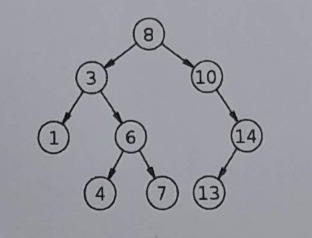

arbol.padresOcupados() = 3 (Los Nodos 8,3 y 6)

In [80]:

class ABB(ABB):
  def padresOcupados(self):
    ocupados = 0
    if not self.estaVacio():
      ocupados = self.__raiz.padresOcupadosNodo()
    return ocupados

  class __NodoArbol(ABB.__NodoArbol):
    def grado(self)->int:
      cantHijos = 0
      if self.tieneIzquierdo():
        cantHijos += 1
      if self.tieneDerecho():
        cantHijos += 1
      return cantHijos

    def padresOcupadosNodo(self):
      ocupados = 0
      if self.grado() == 2:
        ocupados = 1
      if self.tieneIzquierdo():
        ocupados += self.izquierdo.padresOcupadosNodo()
      if self.tieneDerecho():
        ocupados += self.derecho.padresOcupadosNodo()

      return ocupados


arbol1 = ABB()
arbol1.insertar(8)
arbol1.insertar(3);arbol1.insertar(10);arbol1.insertar(1)
arbol1.insertar(6);arbol1.insertar(14);arbol1.insertar(13)
arbol1.insertar(4); arbol1.insertar(7)
arbol1.treePlot("ocupados")

arbol1.padresOcupados()

3